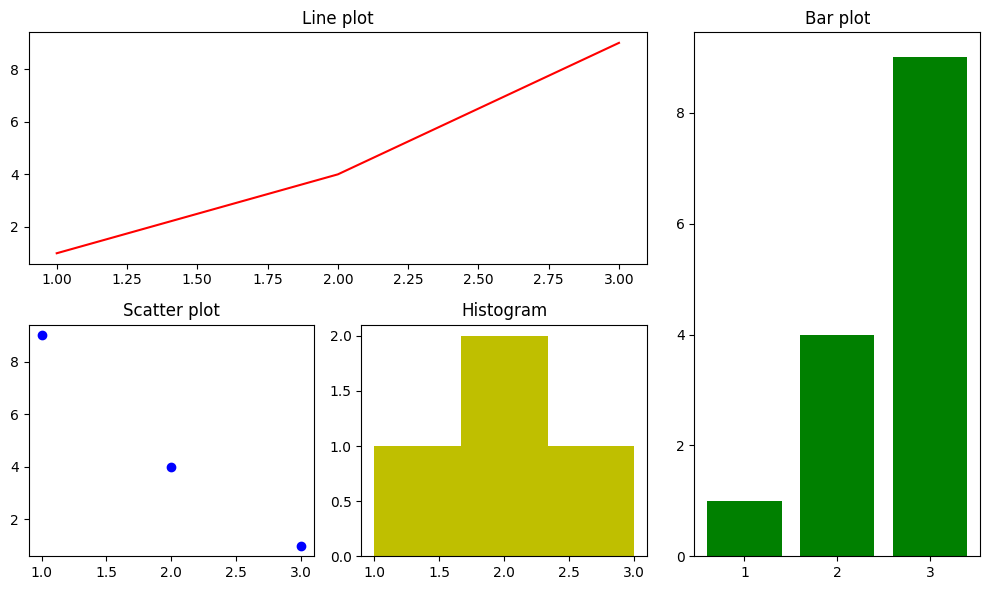

In [1]:
import matplotlib.pyplot as plt

# Define the mosaic layout
mosaic = [
    ["A", "A", "B"],
    ["C", "D", "B"],
]

# Create subplots using the mosaic layout
fig, axd = plt.subplot_mosaic(mosaic, figsize=(10, 6))

# Plot data on each subplot
axd['A'].plot([1, 2, 3], [1, 4, 9], 'r')  # Plot on subplot A
axd['B'].bar([1, 2, 3], [1, 4, 9], color='g')  # Plot on subplot B
axd['C'].scatter([1, 2, 3], [9, 4, 1], color='b')  # Plot on subplot C
axd['D'].hist([1, 2, 2, 3], bins=3, color='y')  # Plot on subplot D

# Add titles to subplots
axd['A'].set_title('Line plot')
axd['B'].set_title('Bar plot')
axd['C'].set_title('Scatter plot')
axd['D'].set_title('Histogram')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'Feature1': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'C', 'A'],
        'Feature2': ['X', 'Y', 'X', 'X', 'Y', 'Y', 'X', 'Y', 'Y', 'X']}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Feature1'], df['Feature2'])

print(contingency_table)

Feature2  X  Y
Feature1      
A         3  1
B         2  1
C         0  3


In [ ]:
import numpy as np

In [4]:
contingency_table

Feature2,X,Y
Feature1,,
A,3,1
B,2,1
C,0,3


In [7]:
contingency_table.columns

Index(['X', 'Y'], dtype='object', name='Feature2')

In [9]:
contingency_table.index

Index(['A', 'B', 'C'], dtype='object', name='Feature1')

In [12]:
annot = []
for index in list(contingency_table.index):
    temp = []
    for column in list(contingency_table.columns):
        num = contingency_table.loc[index, column]
        cell_name = f'{index}\n{column}\n{num}'
        temp.append(cell_name)
    annot.append(temp)

annot = np.array(annot)
annot

array([['A\nX\n3', 'A\nY\n1'],
       ['B\nX\n2', 'B\nY\n1'],
       ['C\nX\n0', 'C\nY\n3']], dtype='<U5')

<Axes: xlabel='Feature2', ylabel='Feature1'>

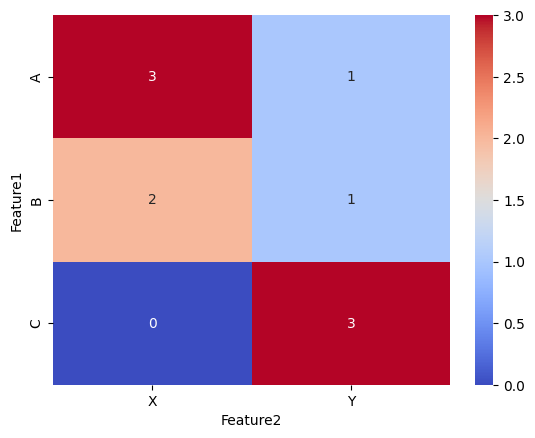

In [13]:
# Create a heatmap from the contingency table
sns.heatmap(contingency_table, annot=True, cmap='coolwarm')

<Axes: xlabel='Feature2', ylabel='Feature1'>

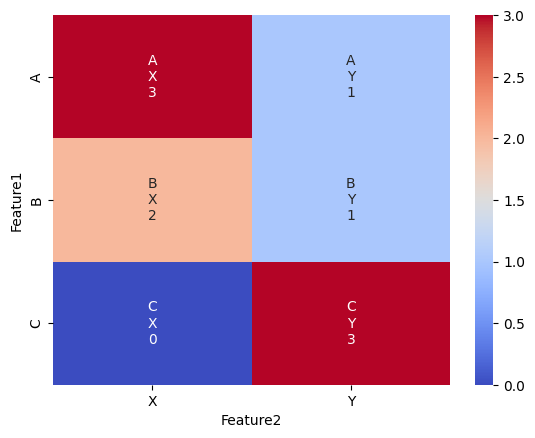

In [15]:
# Create a heatmap from the contingency table
sns.heatmap(contingency_table, annot=annot, cmap='coolwarm', fmt='')